## Linear Quadratic Regulator for an Inverted Pendulum System


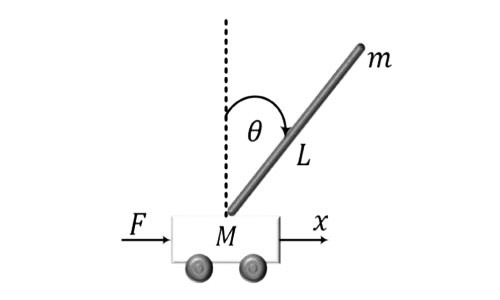

In this tutorial, we will show how to use python to design a full-state feedback controller for an inverted pendulum system

# Inverted pendulum equations of motion


The inverted pendulum system is one of the well-known benchmarks in control systems. It has several different variations including the rotary pendulum and the two-wheeled inverted pendulum. In this tutorial, we will consider an inverted pendulum with a cart as shown in Figure 1 with the parameters given in Table 1.

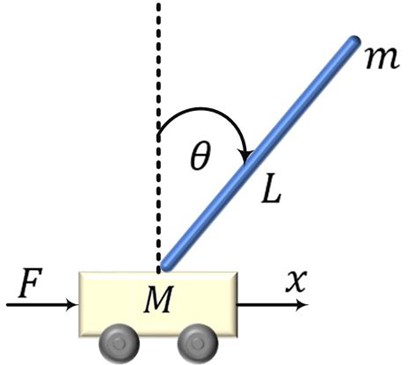

Figure 1 Inverted pendulum block diagram


\begin{array} {|l|l|}\hline Symbol & Description & Value & Unit \\ \hline m & \text{Rod mass} & 0.15 & kg \\ \hline M & \text{Cart mass} & 0.4 & kg \\ \hline L & \text{Rod length} & 0.05 & m \\ \hline J & \text{Rod intertia} & 0.005 & Kg.m^2 \\ \hline b & \text{Friction constant}  & 0.8 & N.m.s \\ \hline  \end{array}

Here, we will consider a linear model around the equilibrium point of interest at the balance position. The Inverted pendulum equations of motion are described in the model as a system of differential equations for the coupled dynamics of both the cart and rod.



<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">(</mo>
    <mi>J</mi>
    <mo>+</mo>
    <mi>m</mi>
    <msup>
      <mi>L</mi>
      <mn>2</mn>
    </msup>
    <mo data-mjx-texclass="CLOSE">)</mo>
  </mrow>
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>&#x3B8;</mi>
      <mo>&#xA8;</mo>
    </mover>
  </mrow>
  <mo>&#x2212;</mo>
  <mi>m</mi>
  <mi>g</mi>
  <mi>L</mi>
  <mi>&#x3B8;</mi>
  <mo>=</mo>
  <mi>m</mi>
  <mi>L</mi>
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>x</mi>
      <mo>&#xA8;</mo>
    </mover>
  </mrow>
</math>

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">(</mo>
    <mi>M</mi>
    <mo>+</mo>
    <mi>m</mi>
    <mo data-mjx-texclass="CLOSE">)</mo>
  </mrow>
  <mi>x</mi>
  <mo>+</mo>
  <mi>b</mi>
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>x</mi>
      <mo>&#x2D9;</mo>
    </mover>
  </mrow>
  <mo>&#x2212;</mo>
  <mi>m</mi>
  <mi>L</mi>
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>&#x3B8;</mi>
      <mo>&#xA8;</mo>
    </mover>
  </mrow>
  <mo>=</mo>
  <mi>F</mi>
</math>

This model represents perturbed dynamics around the vertical balance angle. The above equations can be casted into a state variable model as:



<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">[</mo>
    <mtable columnspacing="1em" rowspacing="4pt">
      <mtr>
        <mtd>
          <mrow data-mjx-texclass="ORD">
            <mover>
              <mi>x</mi>
              <mo>&#x2D9;</mo>
            </mover>
          </mrow>
        </mtd>
      </mtr>
      <mtr>
        <mtd>
          <mrow data-mjx-texclass="ORD">
            <mover>
              <mi>x</mi>
              <mo>&#xA8;</mo>
            </mover>
          </mrow>
        </mtd>
      </mtr>
      <mtr>
        <mtd>
          <mrow data-mjx-texclass="ORD">
            <mover>
              <mi>&#x3B8;</mi>
              <mo>&#x2D9;</mo>
            </mover>
          </mrow>
        </mtd>
      </mtr>
      <mtr>
        <mtd>
          <mrow data-mjx-texclass="ORD">
            <mover>
              <mi>&#x3B8;</mi>
              <mo>&#xA8;</mo>
            </mover>
          </mrow>
        </mtd>
      </mtr>
    </mtable>
    <mo data-mjx-texclass="CLOSE">]</mo>
  </mrow>
  <mo>=</mo>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">[</mo>
    <mtable columnspacing="1em" rowspacing="4pt">
      <mtr>
        <mtd>
          <mn>0</mn>
        </mtd>
        <mtd>
          <mn>1</mn>
        </mtd>
        <mtd>
          <mn>0</mn>
        </mtd>
        <mtd>
          <mn>0</mn>
        </mtd>
      </mtr>
      <mtr>
        <mtd>
          <mn>0</mn>
        </mtd>
        <mtd>
          <mfrac>
            <mrow>
              <mo>&#x2212;</mo>
              <mrow data-mjx-texclass="INNER">
                <mo data-mjx-texclass="OPEN">(</mo>
                <mi>J</mi>
                <mo>+</mo>
                <mi>m</mi>
                <msup>
                  <mi>L</mi>
                  <mn>2</mn>
                </msup>
                <mo data-mjx-texclass="CLOSE">)</mo>
              </mrow>
              <mi>b</mi>
            </mrow>
            <mrow>
              <mi>J</mi>
              <mrow data-mjx-texclass="INNER">
                <mo data-mjx-texclass="OPEN">(</mo>
                <mi>M</mi>
                <mo>+</mo>
                <mi>m</mi>
                <mo data-mjx-texclass="CLOSE">)</mo>
              </mrow>
              <mo>+</mo>
              <mi>M</mi>
              <mi>m</mi>
              <msup>
                <mi>L</mi>
                <mn>2</mn>
              </msup>
            </mrow>
          </mfrac>
        </mtd>
        <mtd>
          <mfrac>
            <mrow>
              <msup>
                <mi>m</mi>
                <mn>2</mn>
              </msup>
              <mi>g</mi>
              <msup>
                <mi>L</mi>
                <mn>2</mn>
              </msup>
            </mrow>
            <mrow>
              <mi>J</mi>
              <mrow data-mjx-texclass="INNER">
                <mo data-mjx-texclass="OPEN">(</mo>
                <mi>M</mi>
                <mo>+</mo>
                <mi>m</mi>
                <mo data-mjx-texclass="CLOSE">)</mo>
              </mrow>
              <mo>+</mo>
              <mi>M</mi>
              <mi>m</mi>
              <msup>
                <mi>L</mi>
                <mn>2</mn>
              </msup>
            </mrow>
          </mfrac>
        </mtd>
        <mtd>
          <mn>0</mn>
        </mtd>
      </mtr>
      <mtr>
        <mtd>
          <mn>0</mn>
        </mtd>
        <mtd>
          <mn>0</mn>
        </mtd>
        <mtd>
          <mn>0</mn>
        </mtd>
        <mtd>
          <mn>1</mn>
        </mtd>
      </mtr>
      <mtr>
        <mtd>
          <mn>0</mn>
        </mtd>
        <mtd>
          <mfrac>
            <mrow>
              <mo>&#x2212;</mo>
              <mi>m</mi>
              <mi>L</mi>
              <mi>b</mi>
            </mrow>
            <mrow>
              <mi>J</mi>
              <mrow data-mjx-texclass="INNER">
                <mo data-mjx-texclass="OPEN">(</mo>
                <mi>M</mi>
                <mo>+</mo>
                <mi>m</mi>
                <mo data-mjx-texclass="CLOSE">)</mo>
              </mrow>
              <mo>+</mo>
              <mi>M</mi>
              <mi>m</mi>
              <msup>
                <mi>L</mi>
                <mn>2</mn>
              </msup>
            </mrow>
          </mfrac>
        </mtd>
        <mtd>
          <mfrac>
            <mrow>
              <mi>m</mi>
              <mi>g</mi>
              <mi>L</mi>
              <mrow data-mjx-texclass="INNER">
                <mo data-mjx-texclass="OPEN">(</mo>
                <mi>M</mi>
                <mo>+</mo>
                <mi>m</mi>
                <mo data-mjx-texclass="CLOSE">)</mo>
              </mrow>
            </mrow>
            <mrow>
              <mi>J</mi>
              <mrow data-mjx-texclass="INNER">
                <mo data-mjx-texclass="OPEN">(</mo>
                <mi>M</mi>
                <mo>+</mo>
                <mi>m</mi>
                <mo data-mjx-texclass="CLOSE">)</mo>
              </mrow>
              <mo>+</mo>
              <mi>M</mi>
              <mi>m</mi>
              <msup>
                <mi>L</mi>
                <mn>2</mn>
              </msup>
            </mrow>
          </mfrac>
        </mtd>
        <mtd>
          <mn>0</mn>
        </mtd>
      </mtr>
    </mtable>
    <mo data-mjx-texclass="CLOSE">]</mo>
  </mrow>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">[</mo>
    <mtable columnspacing="1em" rowspacing="4pt">
      <mtr>
        <mtd>
          <mi>x</mi>
        </mtd>
      </mtr>
      <mtr>
        <mtd>
          <mrow data-mjx-texclass="ORD">
            <mover>
              <mi>x</mi>
              <mo>&#x2D9;</mo>
            </mover>
          </mrow>
        </mtd>
      </mtr>
      <mtr>
        <mtd>
          <mi>&#x3B8;</mi>
        </mtd>
      </mtr>
      <mtr>
        <mtd>
          <mrow data-mjx-texclass="ORD">
            <mover>
              <mi>&#x3B8;</mi>
              <mo>&#x2D9;</mo>
            </mover>
          </mrow>
        </mtd>
      </mtr>
    </mtable>
    <mo data-mjx-texclass="CLOSE">]</mo>
  </mrow>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">[</mo>
    <mtable columnspacing="1em" rowspacing="4pt">
      <mtr>
        <mtd>
          <mn>0</mn>
        </mtd>
      </mtr>
      <mtr>
        <mtd>
          <mfrac>
            <mrow>
              <mi>J</mi>
              <mo>+</mo>
              <mi>m</mi>
              <msup>
                <mi>L</mi>
                <mn>2</mn>
              </msup>
            </mrow>
            <mrow>
              <mi>J</mi>
              <mrow data-mjx-texclass="INNER">
                <mo data-mjx-texclass="OPEN">(</mo>
                <mi>M</mi>
                <mo>+</mo>
                <mi>m</mi>
                <mo data-mjx-texclass="CLOSE">)</mo>
              </mrow>
              <mo>+</mo>
              <mi>M</mi>
              <mi>m</mi>
              <msup>
                <mi>L</mi>
                <mn>2</mn>
              </msup>
            </mrow>
          </mfrac>
        </mtd>
      </mtr>
      <mtr>
        <mtd>
          <mn>0</mn>
        </mtd>
      </mtr>
      <mtr>
        <mtd>
          <mfrac>
            <mrow>
              <mi>m</mi>
              <mi>L</mi>
            </mrow>
            <mrow>
              <mi>J</mi>
              <mrow data-mjx-texclass="INNER">
                <mo data-mjx-texclass="OPEN">(</mo>
                <mi>M</mi>
                <mo>+</mo>
                <mi>m</mi>
                <mo data-mjx-texclass="CLOSE">)</mo>
              </mrow>
              <mo>+</mo>
              <mi>M</mi>
              <mi>m</mi>
              <msup>
                <mi>L</mi>
                <mn>2</mn>
              </msup>
            </mrow>
          </mfrac>
        </mtd>
      </mtr>
    </mtable>
    <mo data-mjx-texclass="CLOSE">]</mo>
  </mrow>
  <mi>F</mi>
</math>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
import collimator as C

we define the model parameters and the state variable matrices

In [2]:
g = 9.81
M = 0.4
m = 0.15                    
b = 0.08
L = 0.25
J = 0.005

In [3]:
den = J*(M+m)+M*m*L**2
A = np.matrix([[0, 1, 0, 0],
              [0, -(J+m*L**2)*b/den, (m**2*g*L**2)/den, 0],
             [0, 0, 0, 1],
             [0, -(m*L*b)/den, m*g*L*(M+m)/den, 0]
             ])
B = np.matrix([0, (J+m*L**2)/den, 0, m*L/den]).T
C = np.matrix([[1, 0, 0, 0],[0, 0, 1, 0]])
D = np.matrix([0, 0]).T
IP_sys = ctrl.ss(A, B, C, D, states=['pos','pos_d','ang', 'ang_d'], 
                 inputs=['F'], outputs=['pos','ang'])
print(IP_sys)

<LinearIOSystem>: sys[2]
Inputs (1): ['F']
Outputs (2): ['pos', 'ang']
States (4): ['pos', 'pos_d', 'ang', 'ang_d']

A = [[ 0.          1.          0.          0.        ]
     [ 0.         -0.17692308  2.12235577  0.        ]
     [ 0.          0.          0.          1.        ]
     [ 0.         -0.46153846 31.12788462  0.        ]]

B = [[0.        ]
     [2.21153846]
     [0.        ]
     [5.76923077]]

C = [[1. 0. 0. 0.]
     [0. 0. 1. 0.]]

D = [[0.]
     [0.]]



If we investigate the dynamics of the inverted poles, we will find an unstable pole as expected

In [4]:
ctrl.pole(IP_sys)


array([ 0.        +0.j, -0.14543315+0.j, -5.59541451+0.j,  5.56392458+0.j])

Before moving on with designing the control, we would like to check if this system is stabilizable and controllable. We can do so by investigating the rank of the controllability matrix

In [5]:
np.linalg.matrix_rank(ctrl.ctrb(IP_sys.A,IP_sys.B))


4

As the controllability matrix for the system has a full rank, the system can be controlled through full-state feedback.

# Inverted pendulum controller design


### Our inverted pendulum controller will have these design requirements:

   * The angle never exceeds <I>0.05 rad</I> for a position step command.
   * Settling time for position and angle less than <I>2 seconds </I> for a position step command.

The full-state feedback has the structure depicted in Figure 2

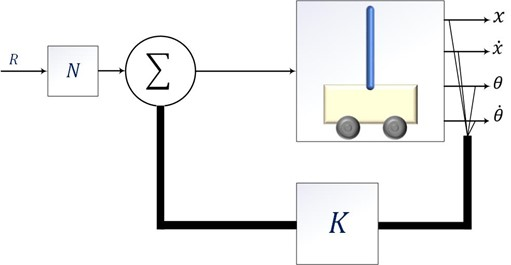

Figure 2 Full-state feedback for inverted pendulum


The state feedback can place the poles by altering the eigenvalues of the closed loop system matrix:



<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <semantics>
    <mrow>
      <mi>u</mi>
      <mo>=</mo>
      <mo>&#x2212;</mo>
      <mi>K</mi>
      <mi>x</mi>
    </mrow>
    <annotation encoding="application/x-tex">u=-Kx</annotation>
  </semantics>
</math>

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <semantics>
    <mrow>
      <msub>
        <mi>A</mi>
        <mi>c</mi>
      </msub>
      <mo>=</mo>
      <mi>A</mi>
      <mo>&#x2212;</mo>
      <mi>B</mi>
      <mi>K</mi>
    </mrow>
    <annotation encoding="application/x-tex">A_c=A-BK</annotation>
  </semantics>
</math>

Consequently, one can select the gains feedback so that it places the poles with required time-domain characteristics. Another way is to select the gains by optimal solution of an unconstrained quadratic cost function problem. The cost function is defined as:



<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <semantics>
    <mrow>
      <mrow data-mjx-texclass="ORD">
        <mi data-mjx-variant="-tex-calligraphic" mathvariant="script">J</mi>
      </mrow>
      <mo>=</mo>
      <mo data-mjx-texclass="OP">&#x222B;</mo>
      <mrow data-mjx-texclass="INNER">
        <mo data-mjx-texclass="OPEN">(</mo>
        <msup>
          <mi>x</mi>
          <mi>T</mi>
        </msup>
        <mi>Q</mi>
        <mi>x</mi>
        <mo>+</mo>
        <msup>
          <mi>u</mi>
          <mi>T</mi>
        </msup>
        <mi>R</mi>
        <mi>u</mi>
        <mo data-mjx-texclass="CLOSE">)</mo>
      </mrow>
      <mi>d</mi>
      <mi>t</mi>
    </mrow>
    <annotation encoding="application/x-tex">\mathcal{J}=\int\left(x^TQx+u^TRu\right)dt</annotation>
  </semantics>
</math>

The Q and R matrices are the relative weights for states and inputs to be optimized. The solution of this problem is conducted by the LQR algorithm. We will first try unity weights for the position, angle, and inputs:

In [6]:
Q = np.diag([1, 0, 1, 0])
R = 1
K, S, E = ctrl.lqr(IP_sys,Q,R)
print(K)

[[-1.         -1.50199865 15.2824112   2.81797302]]


We now try to close the feedback with the obtained gains and investigate a step response

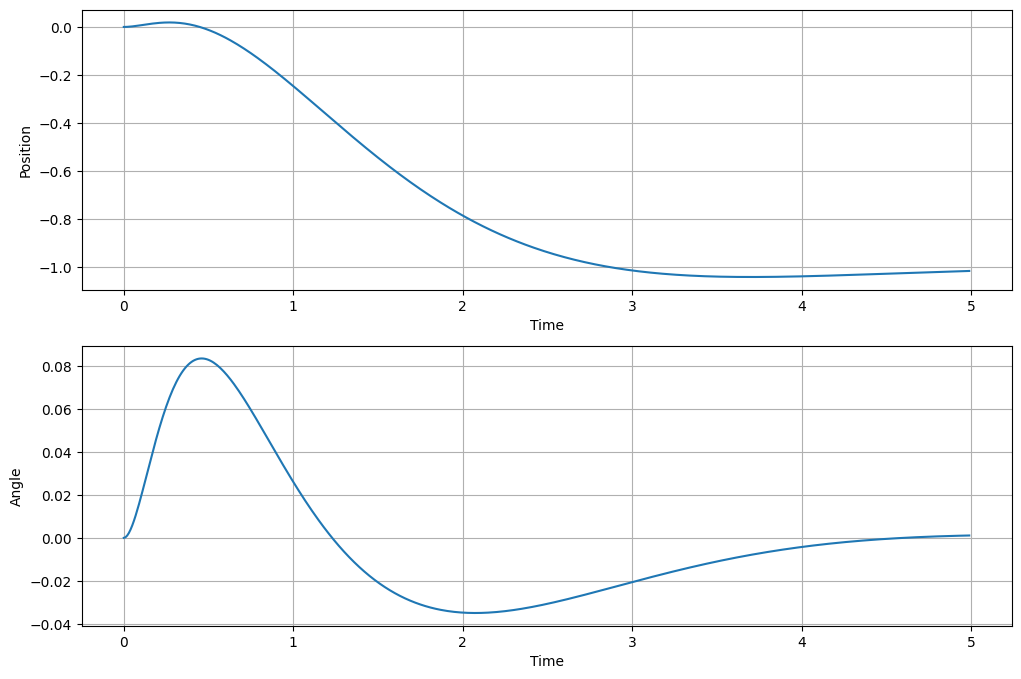

In [7]:
IP_sys_closed = ctrl.ss(A-B*K, B, C, D, states=['pos','pos_d','ang', 'ang_d'], 
                        inputs=['r'], outputs=['pos','ang'])
T, yout = ctrl.step_response(IP_sys_closed,T=np.arange(0, 5, 0.01))

plt.rcParams["figure.figsize"] = (12,8)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(T, yout[0,:].T)
ax2.plot(T, yout[1,:].T)
ax1.set_xlabel('Time')
ax1.set_ylabel('Position')
ax1.grid(which='both')
ax2.set_xlabel('Time')
ax2.set_ylabel('Angle')
ax2.grid(which='both')

From the response above, we can see that the pendulum tracks the step position command. However, the settling time and overshoot requirements are not met.

Next, we try some other gains combination. The new combination gives more weight on position and angle relative to control action signal

In [8]:
Q = np.diag([1000, 0, 100, 0])
R = 1
K, S, E = ctrl.lqr(IP_sys,Q,R)
print(K)

[[-31.6227766  -18.39531133  57.42616018  10.98399441]]


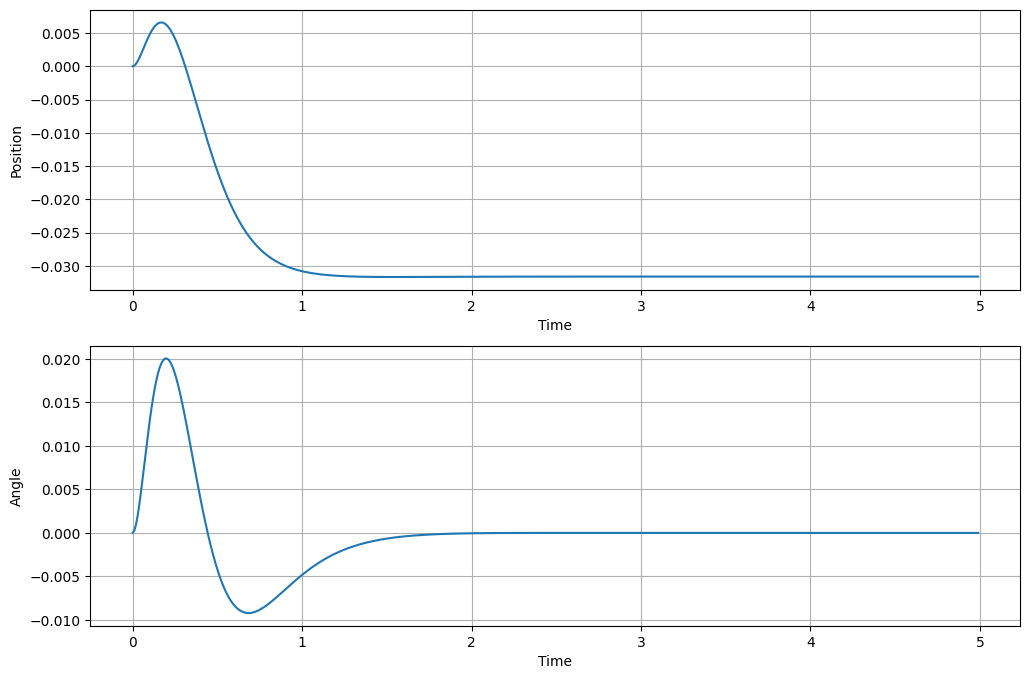

In [9]:
IP_sys_closed = ctrl.ss(A-B*K, B, C, D, states=['pos','pos_d','ang', 'ang_d'], 
                        inputs=['r'], outputs=['pos','ang'])
T, yout = ctrl.step_response(IP_sys_closed,T=np.arange(0, 5, 0.01))
plt.rcParams["figure.figsize"] = (12,8)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(T, yout[0,:].T)
ax2.plot(T, yout[1,:].T)
ax1.set_xlabel('Time')
ax1.set_ylabel('Position')
ax1.grid(which='both')
ax2.set_xlabel('Time')
ax2.set_ylabel('Angle')
ax2.grid(which='both')

## Inverted pendulum control results
Now, we see that the overshoot and settling time are met. But there is a steady-state error at the position. We can eliminate this steady-state error by adding are scaling pre compensator 

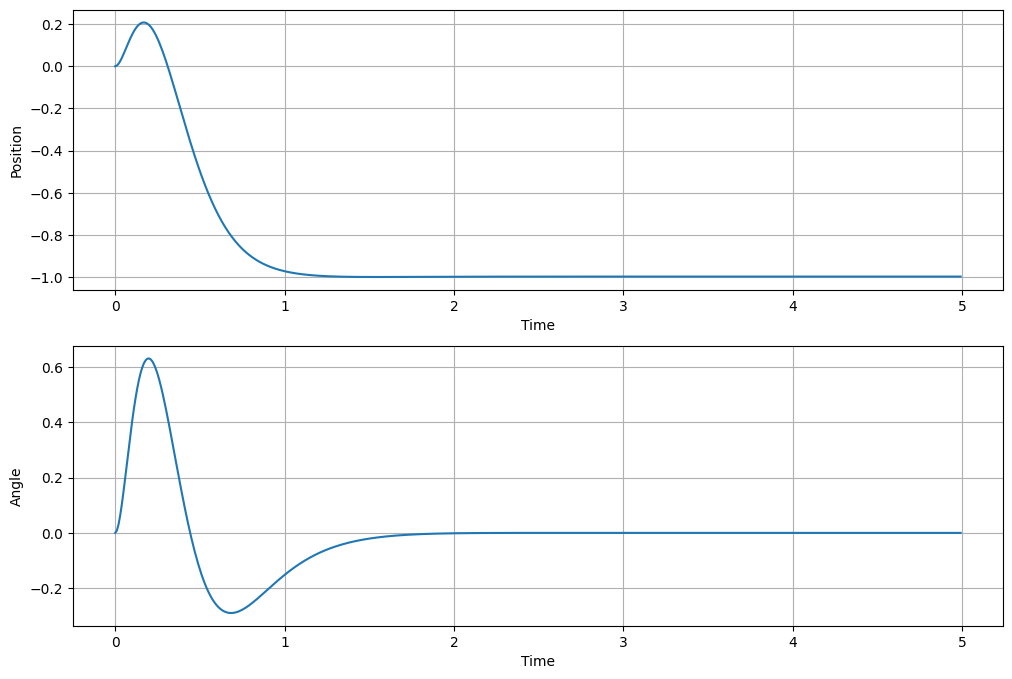

In [10]:
N = 31.5
IP_sys_closed = ctrl.ss(A-B*K, B*N, C, D, states=['pos','pos_d','ang', 'ang_d'], 
                        inputs=['r'], outputs=['pos','ang'])
T, yout = ctrl.step_response(IP_sys_closed,T=np.arange(0, 5, 0.01))
#plt.rcParams["figure.figsize"] = (12,8)
#plt.grid(which='both')
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(T, yout[0,:].T)
ax2.plot(T, yout[1,:].T)
ax1.set_xlabel('Time')
ax1.set_ylabel('Position')
ax1.grid(which='both')
ax2.set_xlabel('Time')
ax2.set_ylabel('Angle')
ax2.grid(which='both')

The final controller now meets the design requirements for our inverted pendulum system.

